In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
data = pd.read_csv("C:/Users/Administrador_SG/Downloads/train.csv")

In [98]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploratory data analysis


In [101]:
sns.set_style('whitegrid')

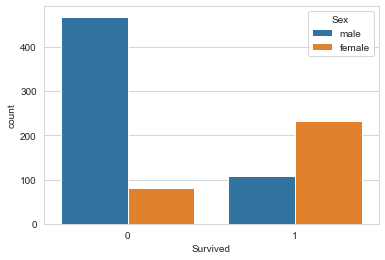

In [102]:
sns.countplot(x='Survived', data=data, hue='Sex')

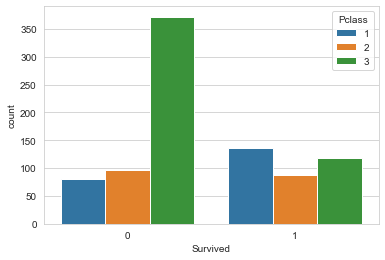

In [103]:
sns.countplot(x='Survived', data=data, hue='Pclass')

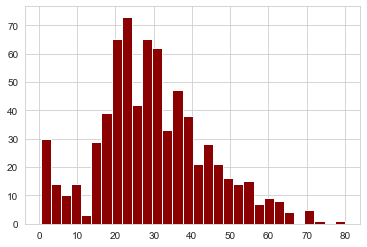

In [104]:
data['Age'].hist(bins=30, color='darkred')

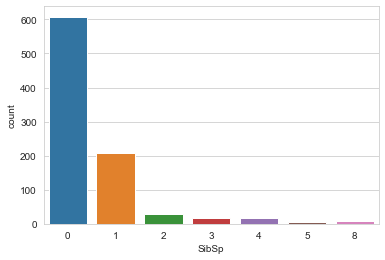

In [105]:
sns.countplot(x='SibSp', data=data)

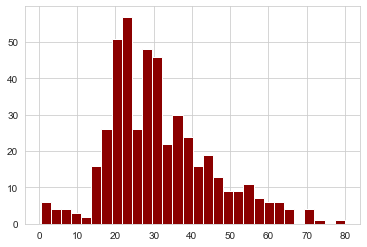

In [106]:
data[data['SibSp']==0]['Age'].hist(bins=30, color='darkred')

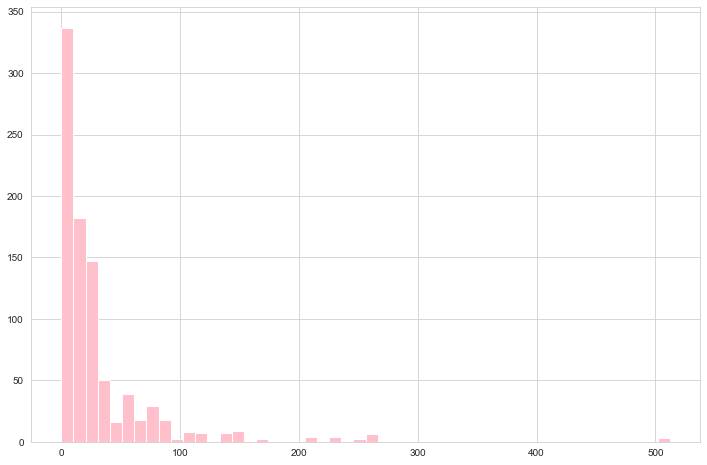

In [107]:
plt.figure(figsize=(12,8))
data['Fare'].hist(bins=50, color='pink')

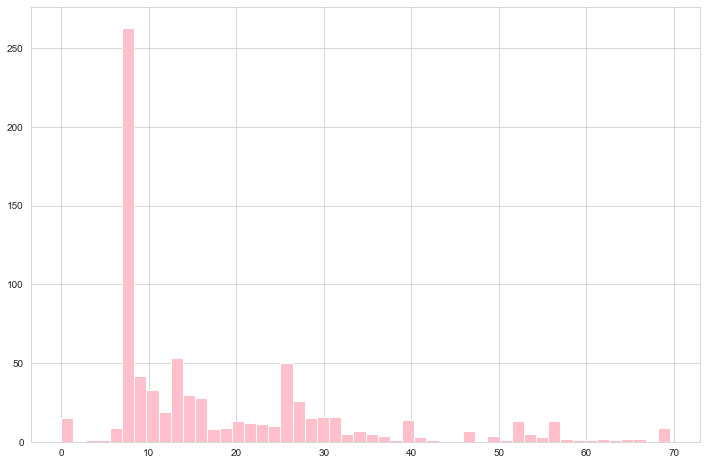

In [108]:
plt.figure(figsize=(12,8))
data[data['Fare']<70]['Fare'].hist(bins=50, color='pink')

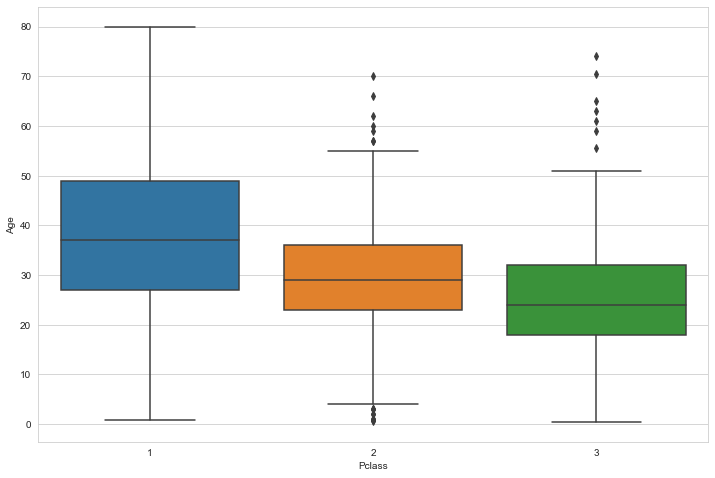

In [109]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=data)

### Removing unusable data

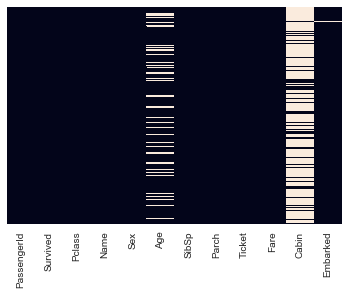

In [100]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [110]:
def ageInput(cols):
    Idade = cols[0]
    Classe = cols[1]
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [111]:
data['Age'] = data[['Age','Pclass']].apply(ageInput, axis=1)

In [112]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

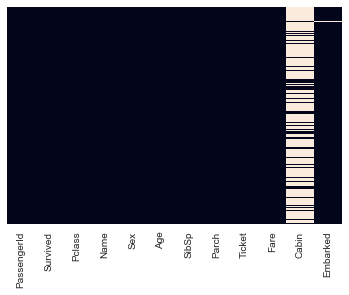

In [113]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [114]:
del data['Cabin']

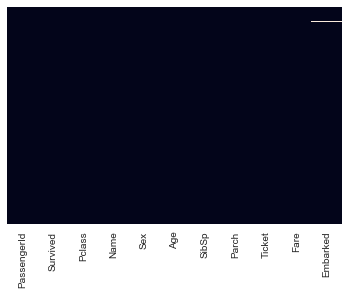

In [115]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [116]:
data.dropna(inplace=True)

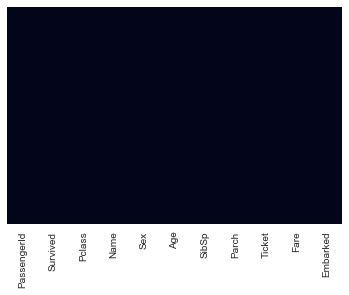

In [117]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [118]:
sex=pd.get_dummies(data['Sex'], drop_first=True)

In [119]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [120]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [121]:
embark = pd.get_dummies(data['Embarked'], drop_first=True)

In [122]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [123]:
data.drop(['Name', 'Sex', 'Ticket', 'PassengerId'], axis=1,inplace=True)

In [124]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [125]:
data = pd.concat([data, sex, embark], axis=1)

In [126]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,24.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [128]:
del data['Embarked']

### Predicting 

In [134]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.3)

In [135]:
logmodel = LogisticRegression()

In [136]:
logmodel.fit(Xtrain,Ytrain)

C:\Users\Administrador_SG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
predictions = logmodel.predict(Xtest)

### Result 

In [140]:
print(classification_report(Ytest,predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       169
           1       0.79      0.66      0.72        98

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [142]:
print(confusion_matrix(Ytest,predictions))

[[152  17]
 [ 33  65]]
